### k-NN Algorithm

Provided Iris data set and k-NN applied to it. Two parameters are interesting: (i) the split which is the size of the training subset v test subset (split = .67) means roughly 2/3rds training, 1/3rd testing, (ii) k which is the size of nearest neighbours. Note, the Accuracy of model is determined for test sets; it measures how well it classifications work for the unseen set.

In [1]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.9
    loadDataset("D:\TextAnalytics\Assignments\Assignment6\iris.csv", split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 2
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    
main()

Train set: 138
Test set: 11
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-versicolor', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
Accuracy: 90.9090909090909%


## Split values:[0.2,0.4,0.6,0.8]
## For every split, k is [1,5,10,15,20]

In [2]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator
import matplotlib.pyplot as plt
import pandas as pd

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # prepare data
    accuracy_dict = {}
    split = [0.2, 0.4, 0.6, 0.8]
    for i in split:
        trainingSet=[]
        testSet=[]
        accuracy = []
        loadDataset("D:\TextAnalytics\Assignments\Assignment6\iris.csv", i, trainingSet, testSet)
        print('\n\nTrain set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        # generate predictions
       
        k = [1,5,10,15,20]
        for j in k:
            predictions=[]
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], j)
                result = getResponse(neighbors)
                predictions.append(result)
                #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
            accuracy.append(getAccuracy(testSet, predictions))
            accuracy_dict[i] = accuracy
        print('\nAccuracy for split=',i ,'and k=',j,'is: ',repr(accuracy) + '%')
   
    dframe = pd.DataFrame(accuracy_dict, index = k)
    #print(dframe)
    
    plt.figure(dpi = 200, figsize = (18,9))
    dframe.plot(marker = 'o')
    plt.title('Accuracy using a split')
    plt.xlabel('Values of k')
    plt.ylabel('Accuracy values')
    plt.xticks([1,5,10,15,20]) 
    
main()



Train set: 38
Test set: 111

Accuracy for split= 0.2 and k= 20 is:  [96.3963963963964, 97.2972972972973, 97.2972972972973, 97.2972972972973, 96.3963963963964]%


Train set: 48
Test set: 101

Accuracy for split= 0.4 and k= 20 is:  [97.02970297029702, 95.04950495049505, 95.04950495049505, 91.0891089108911, 94.05940594059405]%


Train set: 91
Test set: 58

Accuracy for split= 0.6 and k= 20 is:  [96.55172413793103, 91.37931034482759, 91.37931034482759, 89.65517241379311, 89.65517241379311]%


Train set: 107
Test set: 42

Accuracy for split= 0.8 and k= 20 is:  [92.85714285714286, 97.61904761904762, 95.23809523809523, 92.85714285714286, 95.23809523809523]%


## 5 Fold Cross validation
Taking ideas about cross-validation into account; systematically vary the size of the split ; exploring a decent number of other values for it >0.0 and <0.9. Also to systematically vary k on five selected values between 1 and 20.

In [3]:
dframe = pd.read_csv("D:\TextAnalytics\Assignments\Assignment6\iris_crossVal.csv", header= None)
y = dframe.iloc[:,-1]
X = dframe.iloc[:,:-1]
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dframe_dict = {}
mean_list = []

In [5]:
kNN_k = 1
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = mean_list[0]
#print(dframe_dict)


5x CV Accuracy kNNs: 0.96


In [6]:
kNN_k = 5
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean()))  
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.97


In [7]:
kNN_k = 10
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean()))  
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.98


In [8]:
kNN_k = 15
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.97


In [9]:
kNN_k = 20
kNN = KNeighborsClassifier(n_neighbors=kNN_k)  
kNN_scores = cross_val_score(kNN, X, y, cv=5)
print("\n5x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
#print(kNN_scores)
mean_list.append(kNN_scores.mean())
#print('Mean List: ', mean_list)
dframe_dict[kNN_k] = kNN_scores.mean()
#print(dframe_dict)


5x CV Accuracy kNNs: 0.96


### Then plot the accuracy in a graph for these parameter changes Now, using this data set, describe an algorithm for doing a 5-fold cross validation on this data set. See can you implement it in Python.

    Accuracy
1   0.960000
5   0.973333
10  0.980000
15  0.966667
20  0.960000


([<matplotlib.axis.XTick at 0x1aebe00d0b8>,
 <a list of 5 Text xticklabel objects>)

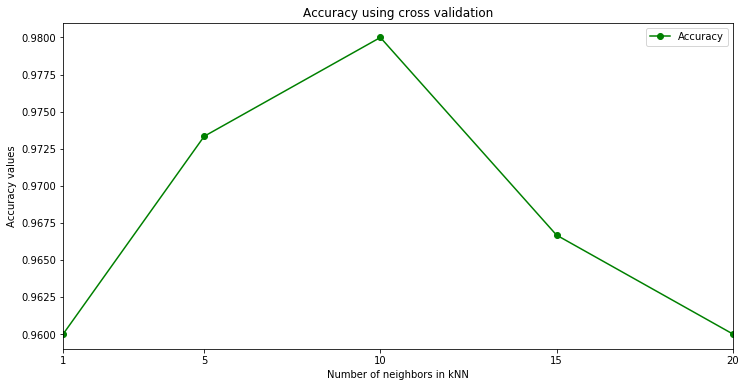

In [10]:
df = pd.DataFrame(mean_list, index = [1,5,10,15,20],columns = ['Accuracy'])
print(df)
df.plot(figsize = (12,6), marker = 'o', color = 'green')
plt.title('Accuracy using cross validation')
plt.xlabel('Number of neighbors in kNN')
plt.ylabel('Accuracy values')
plt.xticks([1,5,10,15,20])

## 2: Naives Bayes
Have a look at the nltk Bayes classifier that does the prediction of male/female names based on the last letter in the name.
Think of a new feature that you could extract from the data-set; define a fn for it (modifying gender_features) and see what is learned from it in the classification.
Compare the accuracy of your feature versus that of the last_letter feature and discuss.

In [11]:
# Fetch last letter from the text

import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

labeled_names = male_names + female_names
random.shuffle(labeled_names)

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(gender_features('Suhana'))
ans2 = classifier.classify(gender_features('Shiro'))

print("Suhana is:", ans1)
print("Shiro is:", ans2)
#print('Male Names: ', male_names)
#print('Female Names',female_names)
classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))

Suhana is: female
Shiro is: male
Most Informative Features
             last_letter = 'a'            female : male   =     35.6 : 1.0
             last_letter = 'k'              male : female =     31.7 : 1.0
             last_letter = 'f'              male : female =     15.2 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0
0.786


In [12]:
# Fetch last letter from the text

import nltk
from nltk.corpus import names
import random

def gender_features_updated(word):
    return {'combo_first_last_letter': word[-1:]+ word[0]}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

labeled_names = male_names + female_names
random.shuffle(labeled_names)

featuresets_updated = [(gender_features_updated(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets_updated[500:], featuresets_updated[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

ans3 = classifier.classify(gender_features_updated('Suhana'))
ans4 = classifier.classify(gender_features_updated('Shiro'))

print("Suhana is:", ans3)
print("Shiro is:", ans4)

classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))

Suhana is: female
Shiro is: male
Most Informative Features
 combo_first_last_letter = 'aC'           female : male   =     57.2 : 1.0
 combo_first_last_letter = 'aD'           female : male   =     39.0 : 1.0
 combo_first_last_letter = 'aR'           female : male   =     37.8 : 1.0
 combo_first_last_letter = 'nH'             male : female =     34.6 : 1.0
 combo_first_last_letter = 'aA'           female : male   =     29.5 : 1.0
0.78


Text(0.5, 1.0, 'Accuracy Plot for classifiers')

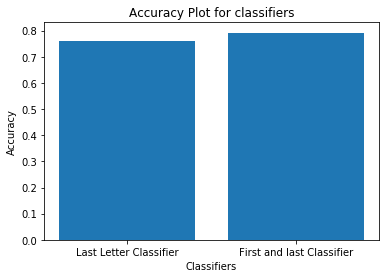

In [13]:
plt.bar(x = ['Last Letter Classifier','First and last Classifier'],height = [0.76,0.792])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot for classifiers')

## 3 SVM
Learning Hand Written Digits Recognition

Now run three different training configurations and then test the outputs for 5-10 different digits;

1797
Prediction: [1]


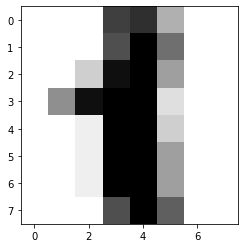

In [14]:
__author__ = 'user'
# http://pythonprogramming.net/support-vector-machine-svm-example-tutorial-scikit-learn-python/

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()

classifier = svm.SVC(gamma=0.01, C=100)

print(len(digits.data))

x, y = digits.data[:-1], digits.target[:-1]
classifier.fit(x, y)

#print('Digits data: ', digits.data[-1].reshape(-1,1))
print('Prediction:', classifier.predict(digits.data[1].reshape(1,-1)))

plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

(64,)

Prediction for C= 0.01 and gamma= 0.5 : [3]
Prediction for C= 0.01 and gamma= 0.5 : [3]
Prediction for C= 0.01 and gamma= 0.5 : [3]
Prediction for C= 0.01 and gamma= 0.5 : [3]
Prediction for C= 0.01 and gamma= 0.5 : [3]

Prediction for C= 10 and gamma= 0.005 : [1]
Prediction for C= 10 and gamma= 0.005 : [8]
Prediction for C= 10 and gamma= 0.005 : [4]
Prediction for C= 10 and gamma= 0.005 : [3]
Prediction for C= 10 and gamma= 0.005 : [9]

Prediction for C= 1000 and gamma= 0.99999 : [1]
Prediction for C= 1000 and gamma= 0.99999 : [3]
Prediction for C= 1000 and gamma= 0.99999 : [4]
Prediction for C= 1000 and gamma= 0.99999 : [3]
Prediction for C= 1000 and gamma= 0.99999 : [9]


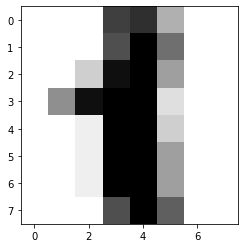

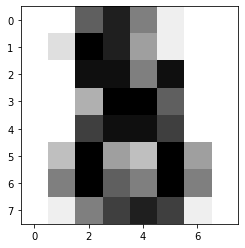

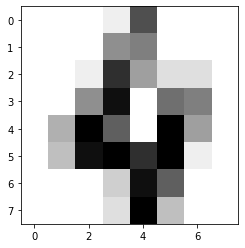

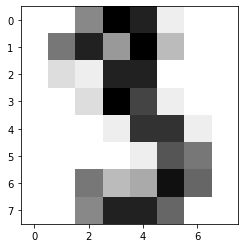

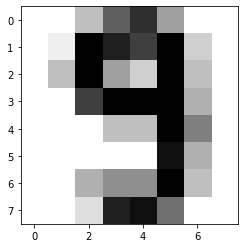

In [15]:
__author__ = 'user'
# http://pythonprogramming.net/support-vector-machine-svm-example-tutorial-scikit-learn-python/

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()
x, y = digits.data[:-1], digits.target[:-1]

C_2d_range = [0.01,10,1000]
gamma_2d_range = [0.5,0.005,0.99999]
print(digits.data[-1].shape)

for i in range(3):
    clf = svm.SVC(C=C_2d_range[i], gamma=gamma_2d_range[i])
    clf.fit(x,y)
    print('\nPrediction for C=', C_2d_range[i],'and gamma=', gamma_2d_range[i],':', clf.predict(digits.data[1].reshape(1,-1)))
    print('Prediction for C=', C_2d_range[i],'and gamma=', gamma_2d_range[i],':',clf.predict(digits.data[-1].reshape(1,-1)))
    print('Prediction for C=', C_2d_range[i],'and gamma=', gamma_2d_range[i],':', clf.predict(digits.data[4].reshape(1,-1)))
    print('Prediction for C=', C_2d_range[i],'and gamma=', gamma_2d_range[i],':', clf.predict(digits.data[3].reshape(1,-1)))
    print('Prediction for C=', C_2d_range[i],'and gamma=', gamma_2d_range[i],':', clf.predict(digits.data[-5].reshape(1,-1)))
    
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

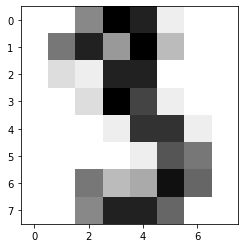

In [16]:
plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')